# RGI - minimal Demo
Make sure that the file amganalysis.py is in the same directory as the this file (or PYTHONPATH).

In [55]:
from amganalysis import *

# Section 1: Running RGI (Demo)
If RGI has already been run and the output files are available, you can proceed directly to [Section 2].

Otherwise, you will need to install RGI and load the CARD database in order to run the analysis. Follow the installation instructions provided in the RGI documentation to set up your environment.

In [ ]:
!rgi load --card_json /opt/conda/envs/rgi/lib/python3.8/site-packages/app/_data/card.json

In [ ]:
!rgi bwt --read_one AFY03_1_toy100K.fastq.gz --read_two AFY03_2_toy100K.fastq.gz --aligner bowtie2 --output_file AFY_toy --threads 10

# Section 2: Loading RGI Output Files

RGI generates a tab-separated spreadsheet that contains the following key columns: ARO Term, Percent Coverage, MAPQ, AMR Gene Family, Drug Class, and more. The output file is typically named as "SampleID.gene_mapping_data.txt".

Before further analysis, basic quality control (QC) checks are applied:
* MAPQ threshold: Default value is set to 10.
* mappedReadThr = 10
* Coverage threshold: The percentage is set to 90%.
* Relative Abundance Calculation: The function also calculates the relative abundance (relAb) of the identified genes.

In [56]:
rgiOutFile= "DemoData2/NoWildAFY01.gene_mapping_data.txt"

In [57]:
geneQC = loadRGI(rgiOutFile, pCovThr=0, mappedReadThr=2)
geneQC.head(3)

,ARO Term,ARO Accession,Reference Model Type,Reference DB,Alleles with Mapped Reads,Reference Allele(s) Identity to CARD Reference Protein (%),Resistomes & Variants: Observed in Genome(s),Resistomes & Variants: Observed in Plasmid(s),Resistomes & Variants: Observed Pathogen(s),Completely Mapped Reads,Mapped Reads with Flanking Sequence,All Mapped Reads,Average Percent Coverage,Average Length Coverage (bp),Average MAPQ (Completely Mapped Reads),Number of Mapped Baits,Number of Mapped Baits with Reads,Average Number of reads per Bait,Number of reads per Bait Coefficient of Variation (%),Number of reads mapping to baits and mapping to complete gene,Number of reads mapping to baits and mapping to complete gene (%),Mate Pair Linkage (# reads),Reference Length,AMR Gene Family,Drug Class,Resistance Mechanism,coverage,relAb
1,dfrF,3002867,protein homolog model,CARD,1,100.0,no data,no data,Enterococcus faecalis,31.0,25.0,56.0,100.0,495.0,21.91,0,0,0,0,NaN,NaN,NaN,495,trimethoprim resistant dihydrofolate reductase...,diaminopyrimidine antibiotic,antibiotic target replacement,9.393939,0.021863
6,lnuA,3002835,protein homolog model,CARD,1,100.0,no data,no data,Staphylococcus haemolyticus,26.0,16.0,42.0,100.0,486.0,24.71,0,0,0,0,NaN,NaN,NaN,486,lincosamide nucleotidyltransferase (LNU),lincosamide antibiotic,antibiotic inactivation,8.024691,0.018676
9,msrE,3003109,protein homolog model,CARD,1,100.0,no data,no data,Acinetobacter baumannii,2481.0,309.0,2790.0,100.0,1476.0,38.08,0,0,0,0,NaN,NaN,tet(C) (1); mphE (1),1476,msr-type ABC-F protein,macrolide antibiotic; streptogramin antibiotic,antibiotic target protection,252.134146,0.586799


In [60]:
import glob

sampleFiles = ['DemoData2/NoWildAFY01.gene_mapping_data.txt',
 'DemoData2/NoWildAFY11.gene_mapping_data.txt',
 'DemoData2/NoWildAFY13.gene_mapping_data.txt',
 'DemoData2/NoWildAFY16.gene_mapping_data.txt']


#alternatively, specify 
#sampleFiles = glob.glob('*gene_mapping_data.txt') ## all gene_mapping files in a directory


# Section 3: Clustering Analysis for Multiple RGI Output Files and Visualization

Input Files: This function assumes that the user provides a list of files generated by RGI (typically ending in .gene_mapping_data.txt).

Sample ID Naming: The first part of the RGI file name will be used as the sampleID in the graphs. For example, file names such as NoWildAFY01.gene_mapping_data.txt and NoWildAFY03.gene_mapping_data.txt will use NoWildAFY01 and NoWildAFY03 as the sample IDs in the visualizations, as demonstrated in the demo example.

Clustering Criteria: The clustering can be performed based on any appropriate column from the RGI output files, such as ARO Term, Percent Coverage, MAPQ, etc., depending on the analysis objectives.
Quality Control: Basic quality control (QC) checks are applied using the loadRGI function

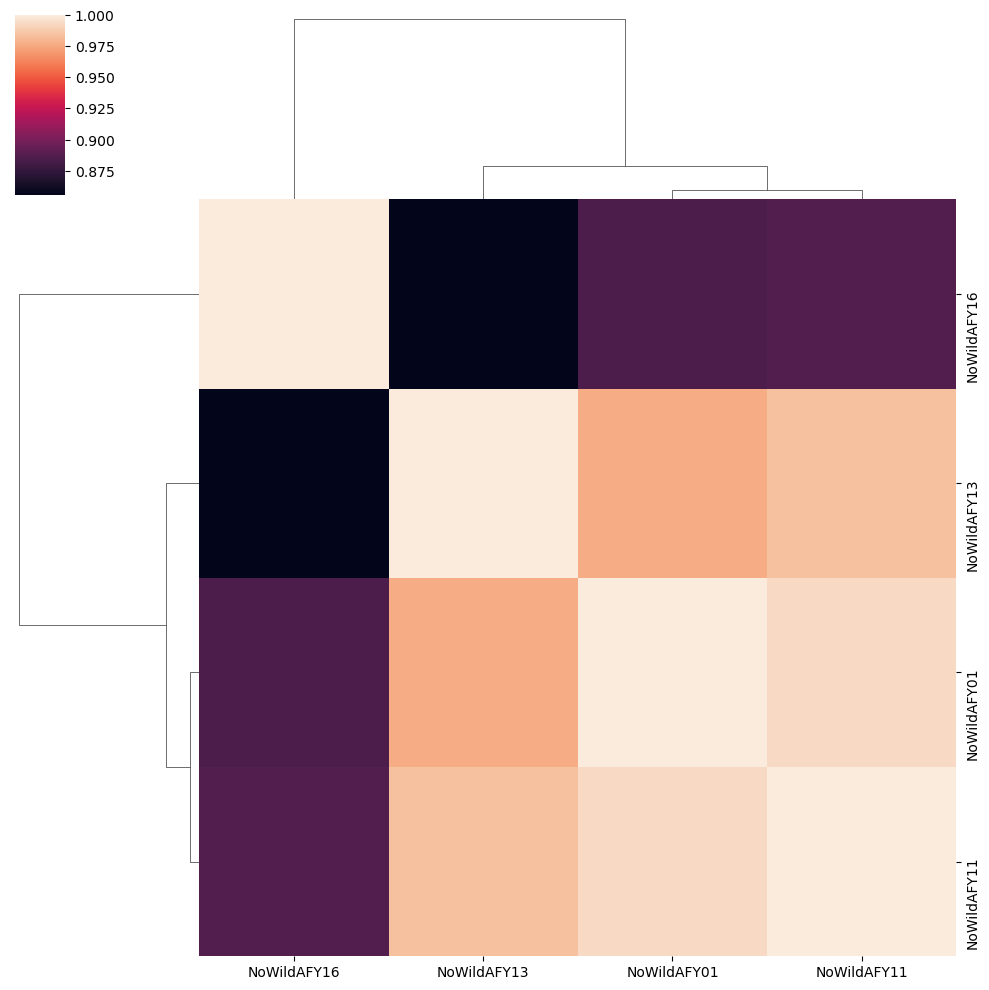

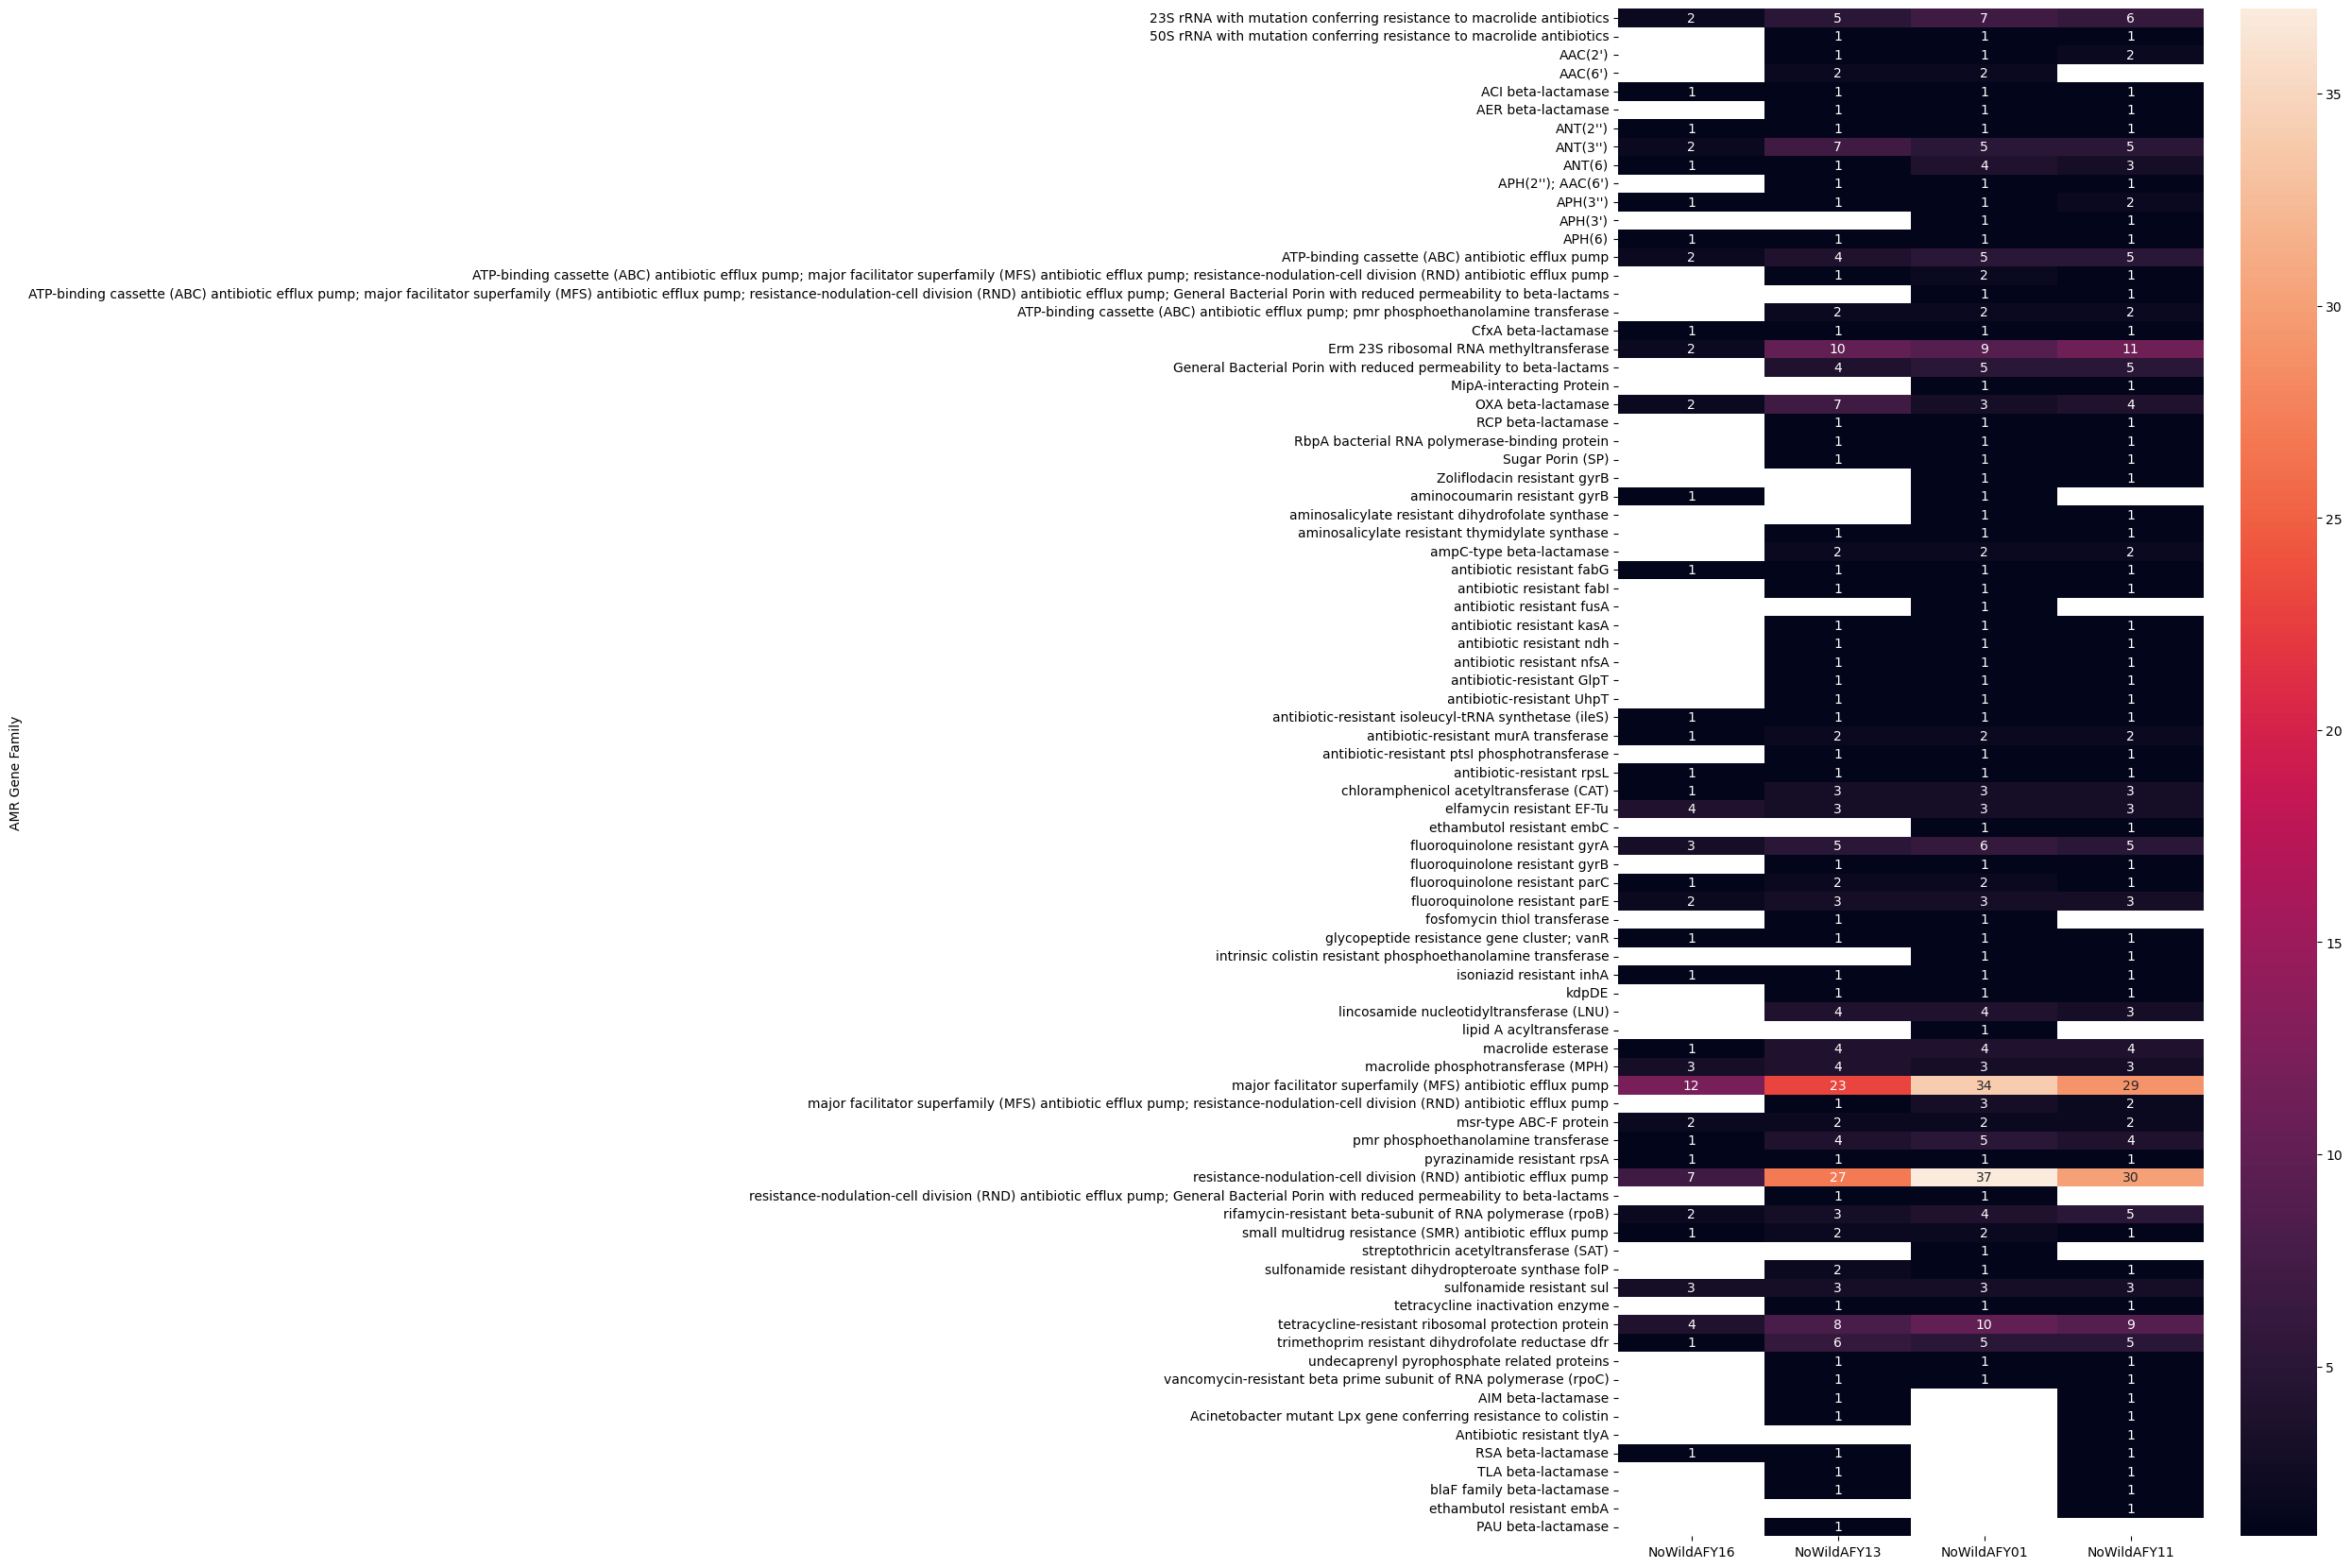

In [61]:
cluster(sampleFiles)
#defult will group by "AMR Gene Family" can also use "Drug Class" or "Resistance Mechanism"

### Grouping by Drug Class

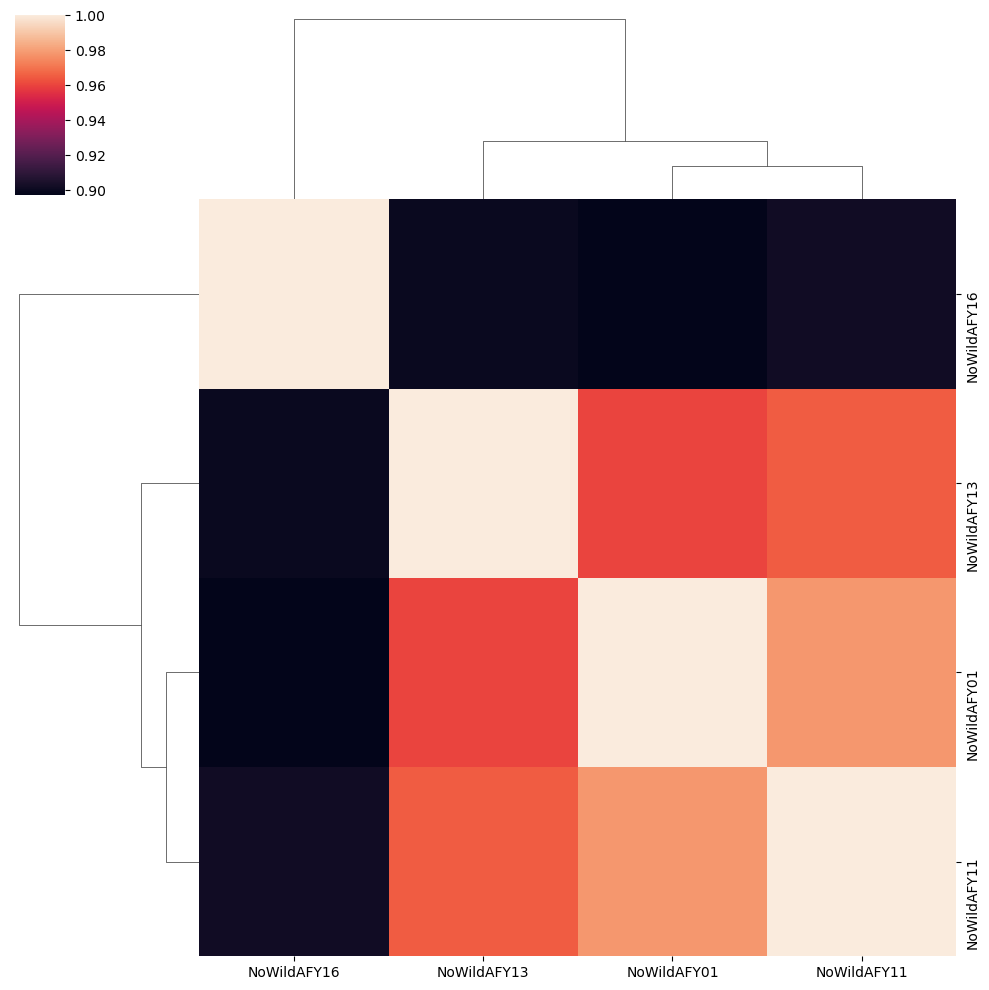

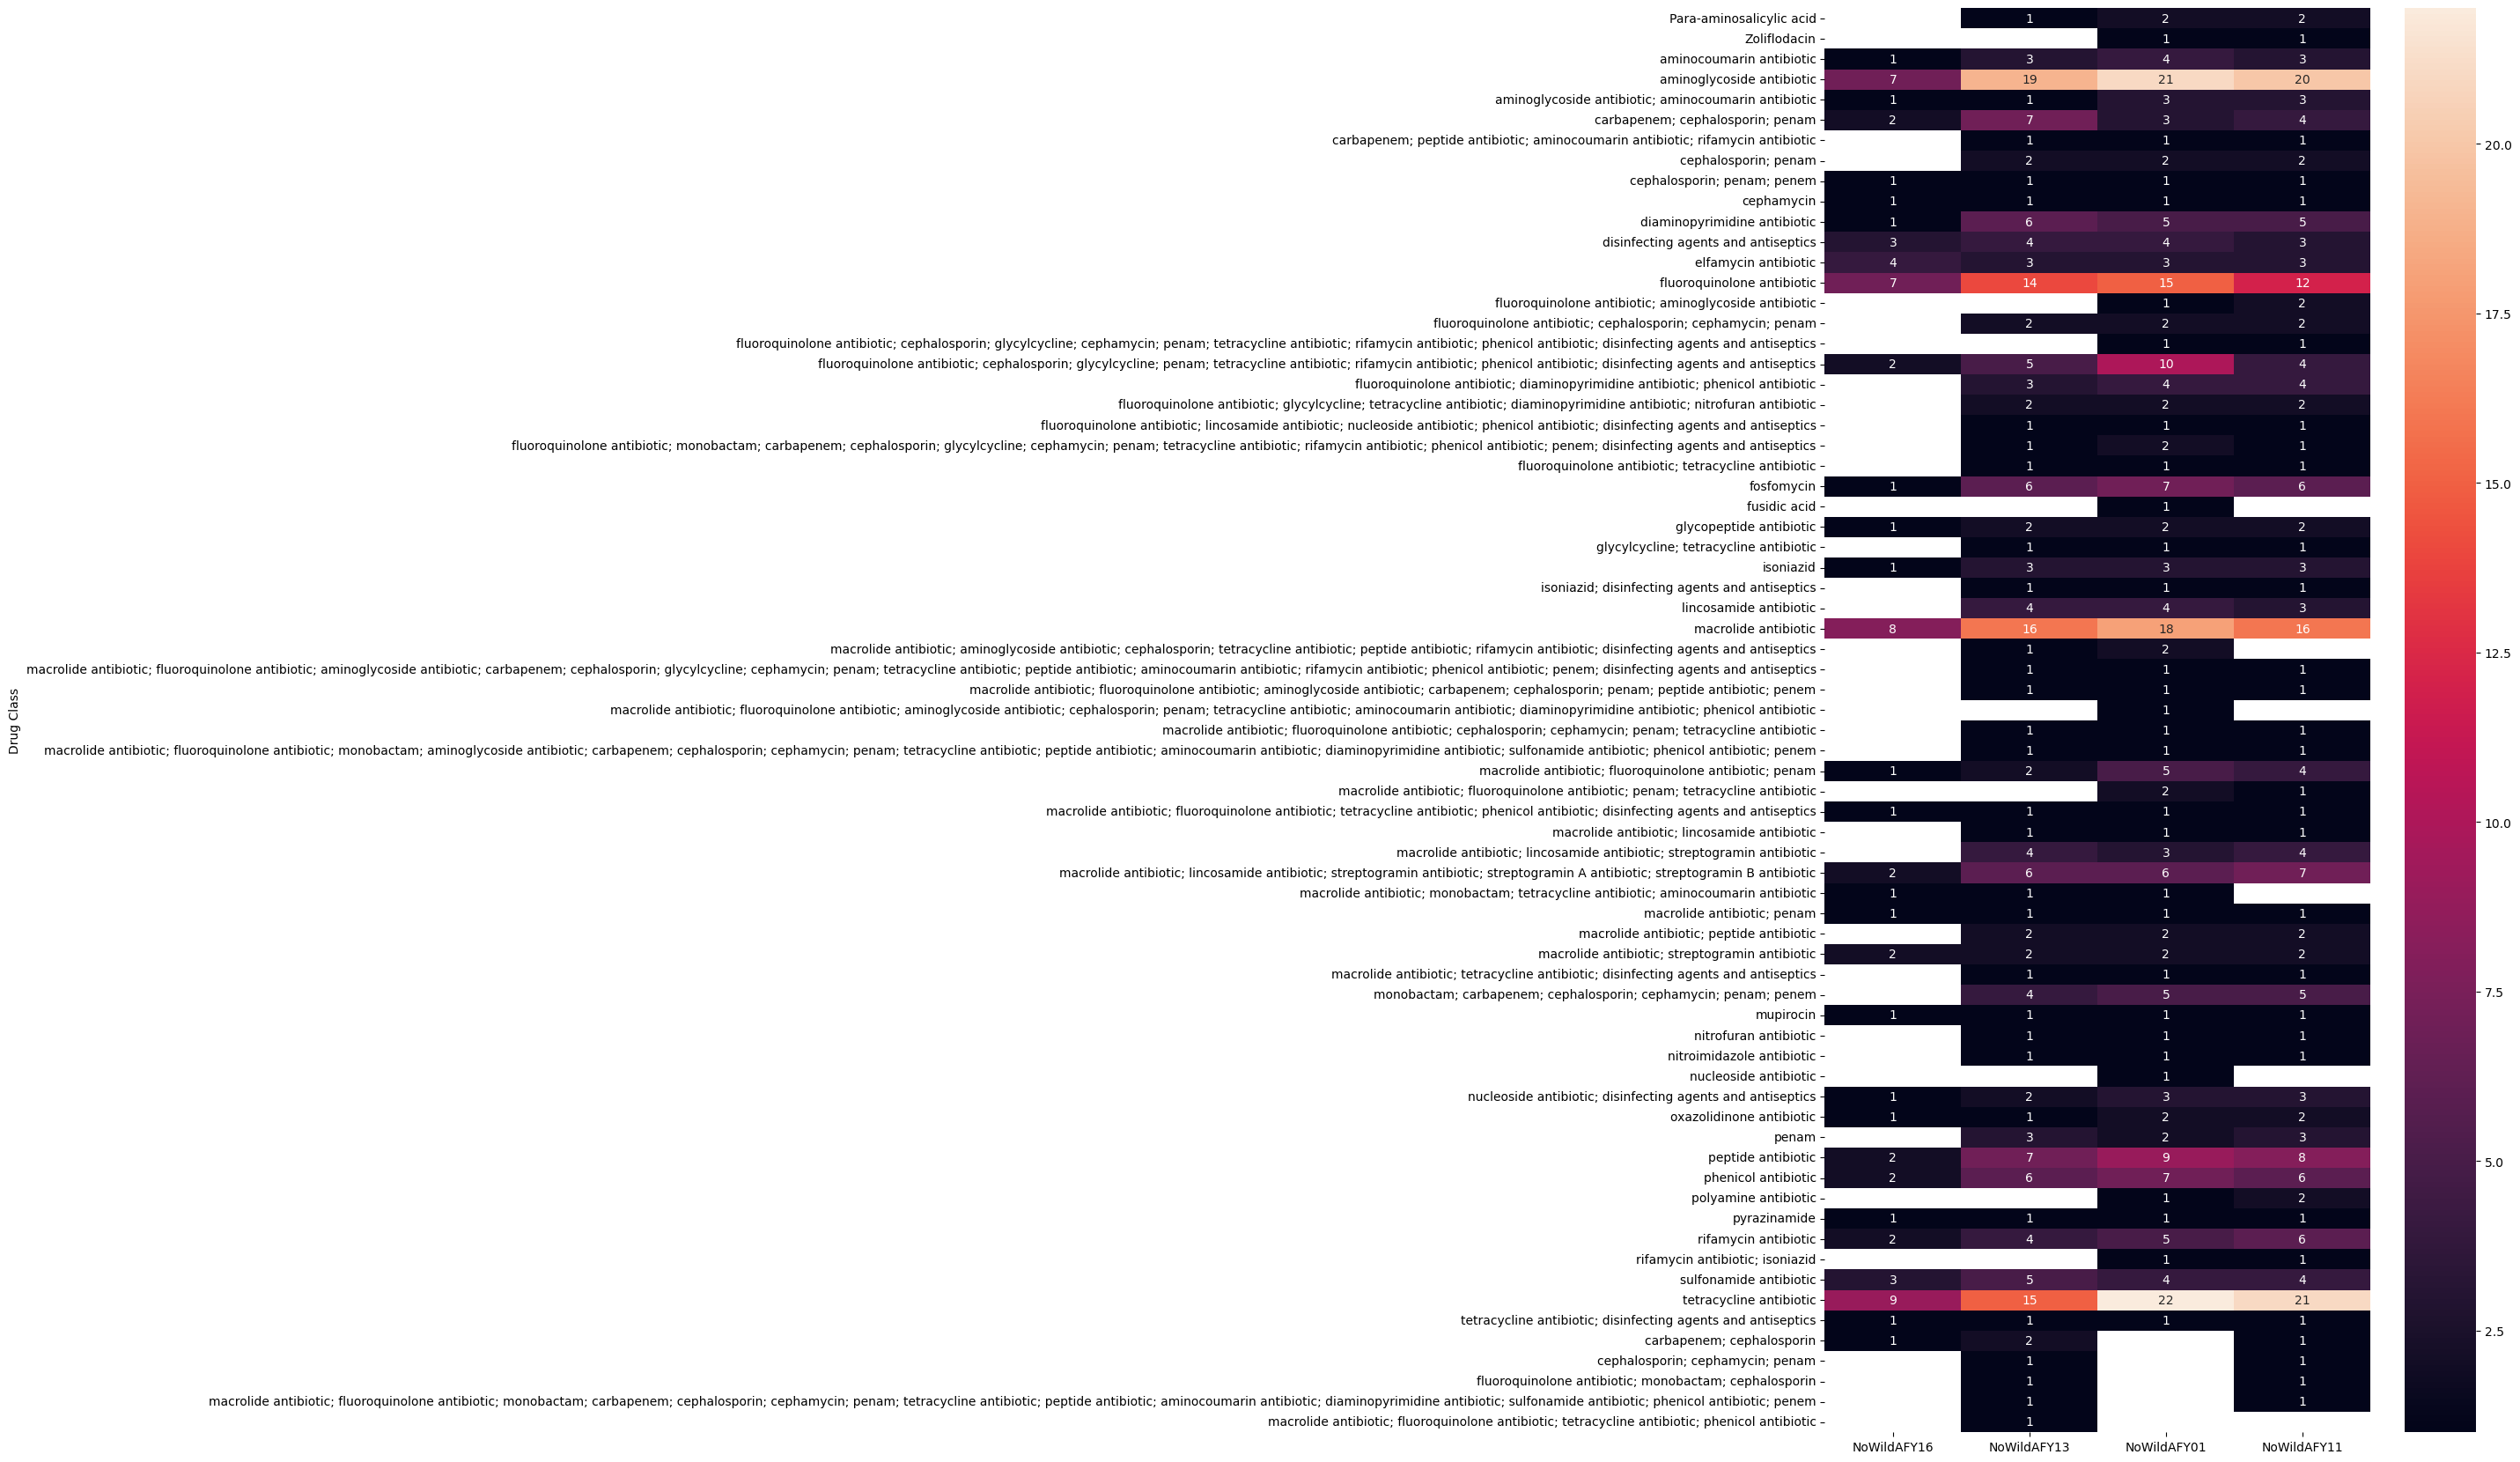

In [53]:
cluster(sampleFiles, groupbyCol='Drug Class')

### Grouping by Resistance Mechanism

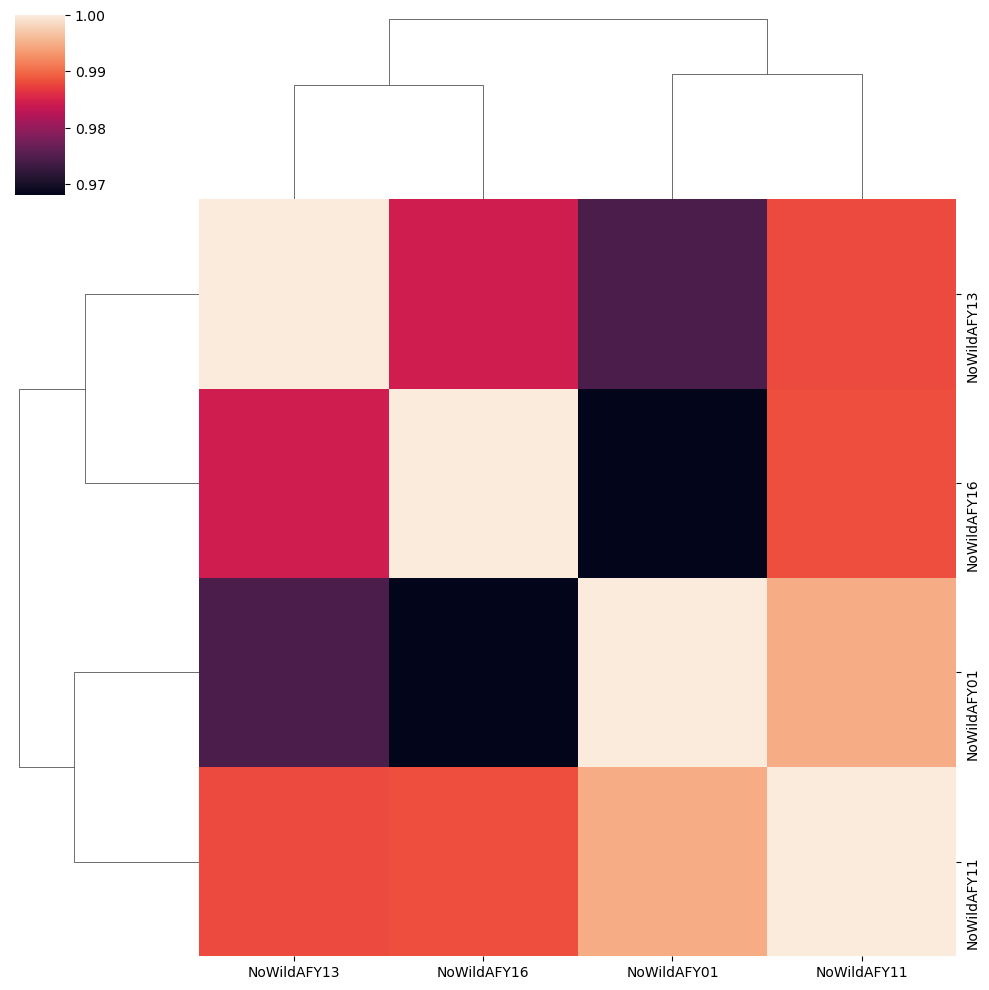

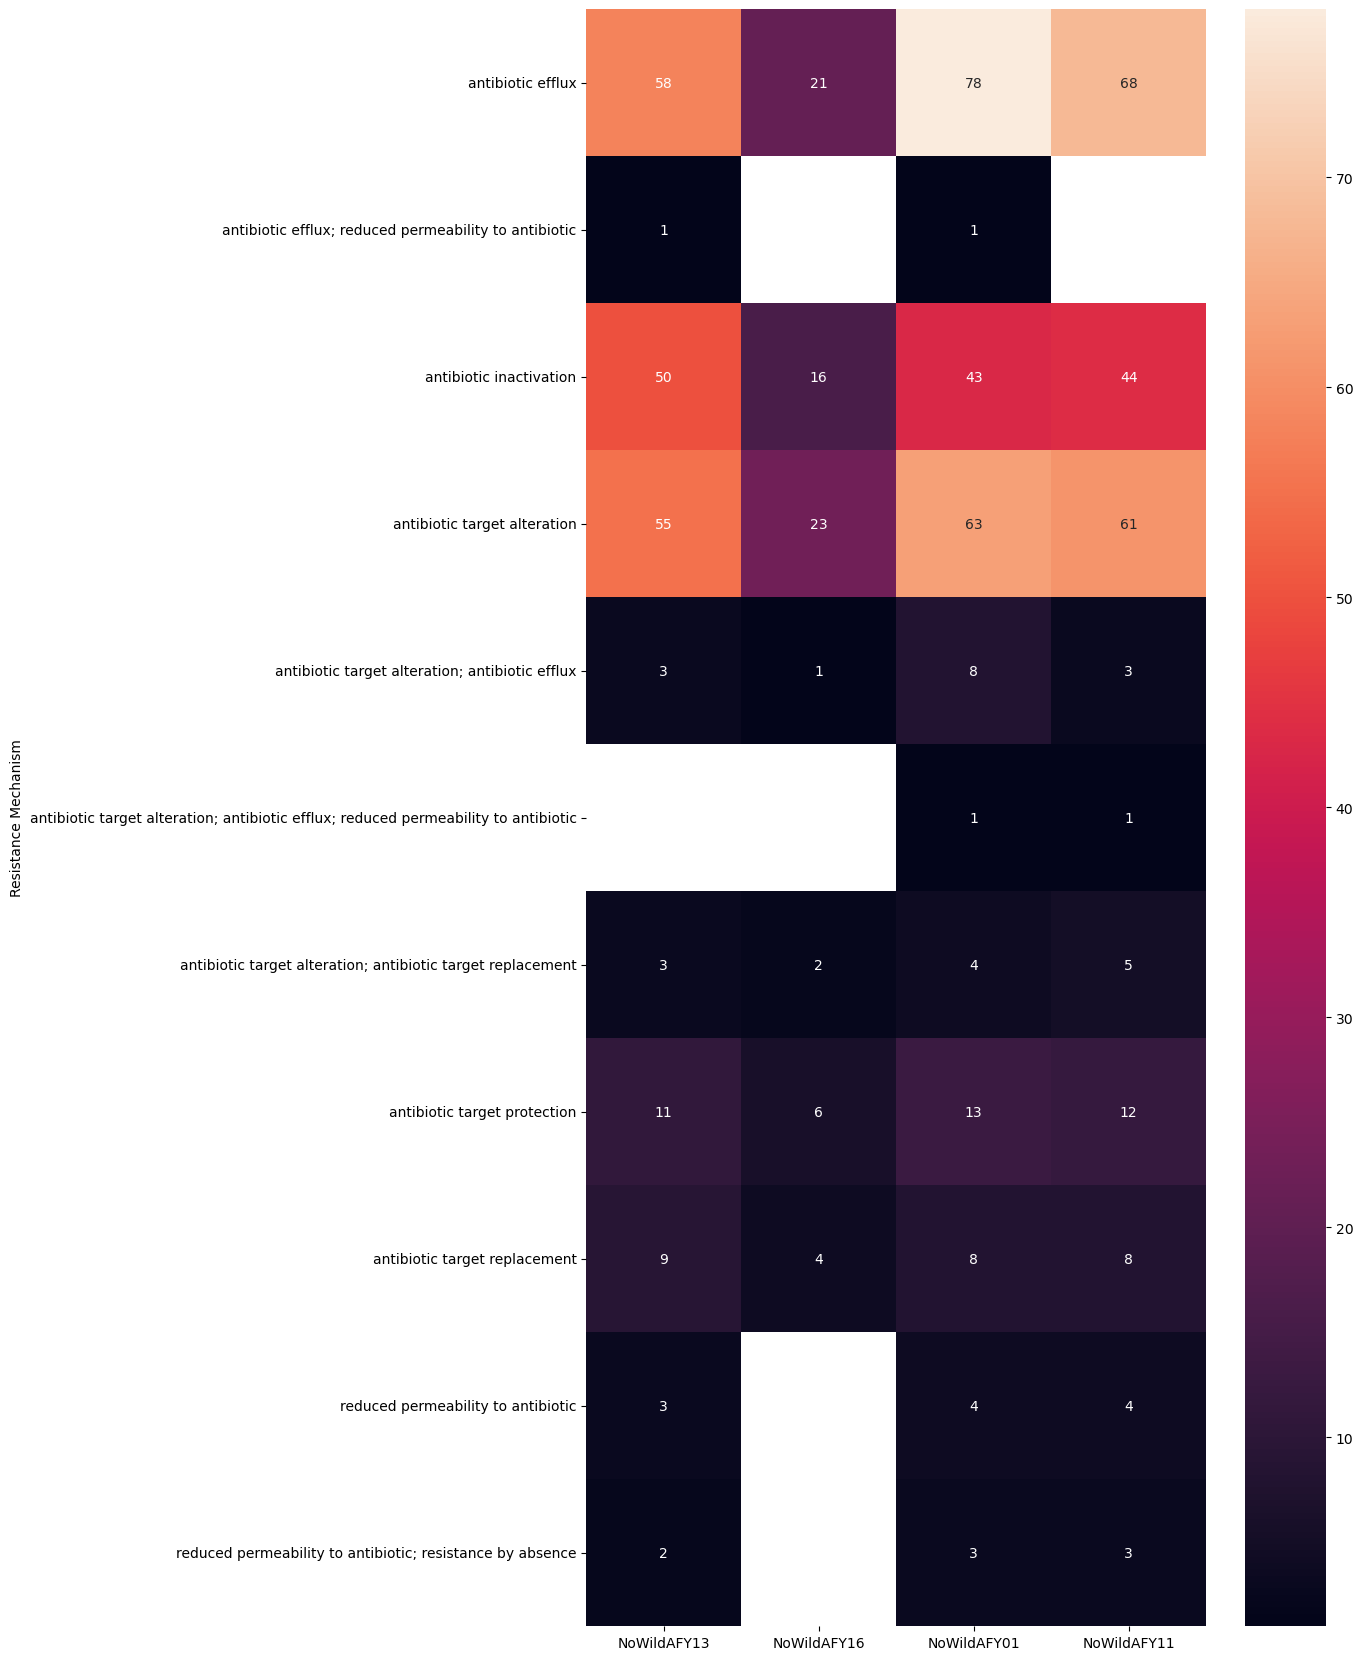

In [62]:
cluster(sampleFiles, groupbyCol='Resistance Mechanism')